# Dimensionality Reduction

When working with neuroscientific data, an important first step before any kind of modelling or analysis is preprocessing. This means preparing your data in a way that makes it easier to find patterns, while reducing noise and complexity.

A big part of preprocessing is **dimensionality reduction**. Neural data is usually high-dimensional and complex. Dimensionality reduction helps simplify this by projecting the data into a lower-dimensional space. This makes it easier to visualise, explore and understand.

There are different methods you can use depending on your research question, your goal, and the type of data you are working with.

In this tutorial, you will learn how to implement some of the most commonly used dimensionality reduction methods in Python. The idea is to give you an intuition for how each method works and how it changes your data. To make things more intuitive, we will start with a simple handwritten digit dataset. Later, you can apply the same techniques to more complex neuroscience data and your own projects.

### Techniques we will cover

**Linear method:**
- Principal Component Analysis (PCA)

**Non-linear methods:**
- t-SNE (t-distributed Stochastic Neighbor Embedding)
- UMAP (Uniform Manifold Approximation and Projection)

**Non-linear, learning-based method:**
- Variational Autoencoders (VAEs)


The short presentation in the beginning of the workshop (the slides are on github) will give you an overview of the topic. If you're interested in diving deeper, feel free to refer to the following resources:

### Further resources

**Detailed tutorial**  
Neuromatch Academy:  
[https://compneuro.neuromatch.io/tutorials/W1D4_DimensionalityReduction/student/W1D4_Intro.html](https://compneuro.neuromatch.io/tutorials/W1D4_DimensionalityReduction/student/W1D4_Intro.html)

**Mathematical foundations of PCA**  
Covariance matrices and eigenvalues (YouTube):  
[https://youtube.com/watch?v=-f6T9--oM0E](https://youtube.com/watch?v=-f6T9--oM0E)

**Intuition for PCA**  
[https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

**Intuition for t-SNE**  
[https://towardsdatascience.com/t-sne-machine-learning-algorithm-a-great-tool-for-dimensionality-reduction-in-python-ec01552f1a1e](https://towardsdatascience.com/t-sne-machine-learning-algorithm-a-great-tool-for-dimensionality-reduction-in-python-ec01552f1a1e)

**UMAP overview**  
[https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568](https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568)

**Understanding VAEs**  
[https://towardsdatascience.com/variational-bayes-4abdd9eb5c12](https://towardsdatascience.com/variational-bayes-4abdd9eb5c12)


# Dataset - Images of Handwritten Digits

The dataset contains ten classes of handwritten digits, where each image is 28 by 28 pixels. That means each image has 784 features. Can we really reduce these 784 dimensions down to just two or three and still separate the digit classes in a meaningful way? Let’s explore that by trying out a few different dimensionality reduction techniques.

In this example, we will use the MNIST dataset, a classic computer vision dataset made up of grayscale images of hand-drawn digits from 0 to 9.

Each image is 28 pixels high and 28 pixels wide, resulting in 784 pixels per image. Each pixel is an integer between 0 and 255, where higher values correspond to darker pixels:

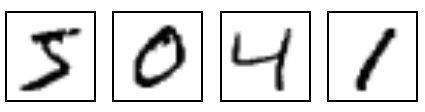

Because the dataset is both large and high-dimensional, and may contain noise unrelated to the core structure of the digits, reducing the number of features is a sensible first step. We will explore a few different dimensionality reduction techniques on the MNIST dataset and look at how each method transforms the data. We’ll start with PCA, then move on to other approaches, and compare their effects along the way.

Ler us start by loading the dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

#load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)
print("MNIST dataset loaded with shape:", X.shape)

#visualize some samples from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y[i]}')
plt.tight_layout()
plt.show()


## Principal Component Analysis (PCA)

We begin with one of the most commonly used dimensionality reduction techniques: Principal Component Analysis (PCA). PCA is a linear method that finds the directions (principal components) along which the variance of the data is maximized.

PCA helps simplify high-dimensional data by projecting it into a smaller number of dimensions while keeping as much of the original structure as possible. This makes it easier to visualize and understand complex data, like neural recordings or images.

PCA works by using the correlation between dimensions to figure out which combinations of variables best capture how the data varies. It keeps the most important information and drops the rest.

In our case, each image is made up of 28×28 pixels - so each one is a point in 784-dimensional space. But we don’t need all 784 dimensions to understand the structure. A lot of those pixels might be empty or irrelevant. Reducing the number of dimensions makes it easier to see patterns.

To get a better sense of how this works, we will use PCA to reduce the dimensionality of our MNIST data and see what the result looks like.

We can either use a function from `scikit-learn` that performs all the steps for us, or go through the steps one by one to understand what PCA actually does:

### Implementing PCA – Going Manually Through the Steps

1. **Standardize the data**  
   Ensure that each feature (pixel) has zero mean and unit variance.

2. **Construct the covariance matrix**  
   Compute the covariance matrix of the standardized data to capture the relationships between features.

3. **Compute the eigenvalues and eigenvectors**  
   These reveal the directions (principal components) in which the data varies the most, and how much variance each component explains.

4. **Sort and select top components**  
   Sort the eigenvectors by their corresponding eigenvalues in descending order. Select the top *k* eigenvectors to retain the desired amount of variance.

5. **Project the data**  
   Multiply the original (standardized) data by the selected eigenvectors to obtain the reduced-dimensional representation.


In [ ]:
#####CODING EXERCISE - STEPS 1-2 ########

#1:standardize the data
X_scaled = StandardScaler().fit_transform(X) #standard scaler essentially centers the data to a zero mean and scales it to unit variance. why do we do this for PCA? Explain!

#2:construct the covariance matrix
cov_matrix = ... # TODO - hint use a numpy function to compute the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)

#plot the covariance matrix
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix of MNIST Dataset')
plt.show()

_Exercise:_

What does the plot of the covarience matrix show? What do the colours represent and why do you see the specific patterns for the MNIST dataset? 

Remember: the features here represent different pixels in the handwritten digit images, and the covariance is a measure of how much two values (pixels) change together.

Explain!

Feel free to ask TAs if you are unsure about the linear algebra behind this!

In [ ]:
#####CODING EXERCISE - STEPS 3-4########

#3:compute the eigenvalues and eigenvectors - using the computed covarience matrix from step 2, we can now compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = ...  # TODO - use numpy's linear algebra module to compute the eigenvalues and eigenvectors
print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)

#4:sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted eigenvalues shape:", eigenvalues.shape)


k = 2  #change this value to see more or fewer eigenvectors
top_eigenvectors = eigenvectors[:, :k]
print("Top eigenvectors shape:", top_eigenvectors.shape)

#plot the top eigenvectors
plt.figure(figsize=(10, 4))
for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(top_eigenvectors[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Eigenvector {i + 1}')
plt.tight_layout()
plt.show()


_Exercise:_

Going back to linear algebra, we learned that eigenvectors are the main directions of change. In PCA, we use them to find where the data varies most.

But what does that mean for MNIST?

Look at your plots of the two top eigenvectors. Explain:

    - What patterns do you see?
    
    - What parts of the digits do they highlight?

    - Why might these directions be important for separating digits?

Remember, these are not images of digits, but directions in pixel space.

In [ ]:
#####CODING EXERCISE - STEP 5########

#5:Project the data onto the new feature space - go through the code and make sure you understand each line
X_pca = X_scaled.dot(top_eigenvectors)
print("Projected data shape:", X_pca.shape)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='Digit Label')
plt.title('PCA of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

This plot displays your MNIST data in a reduced two-dimensional space using PCA. Each point is a digit, and colours show which digit it represents.

_Exercise:_

Discribe, what do you see? How do the clusters look like?

Thinking about our objective here - we often want to separate digit classes as clearly as possible. So reducing the data to a space where these clusters are well separated is helpful for classification and further analysis.

Do the digits form clear groups? Are some more mixed than others? What might that tell us about the limits of linear methods like PCA?

### Applying PCA using sklearn
Instead of manually going through all of these steps, a sklearn function can do them all for us in one line. Compare the output to your plots before. They should look very similar.

In [ ]:
projected = PCA(n_components=2).fit_transform(X_scaled) #apply PCA using scikit-learn – this single line does all PCA steps in one!


#Same plot as above but using the sklearn PCA implementation
plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of MNIST Data')
plt.colorbar(label='Digit Label')
plt.grid(True)
plt.tight_layout()
plt.show()

_Exercise: Change the *k* Value and Explore Its Effect on PCA:_

Choosing a fitting number of principal components (*k*) is especially important when working with neuroscience data or any complex dataset. It’s crucial to align this choice with your research goals.

Go back to your steps of PCA before and try different k-values, 

1. How much variance do the selected components explain?  
   **CODING TO DO:** Plot the relationship between *k* and the cumulative explained variance to help choose a meaningful value for *k*.  HINT - you cxan calculate the varience ratio
2. What patterns do you notice in the eigenvector images as *k* increases or decreases?
3. How does the projection of the data look in the reduced space?   HINT - plot the 2D PCA projection (using the first two components) to see how well data clusters separate as *k* changes


Try different values like 1, 5,10,50,... and reflect on how dimensionality reduction quality and interpretability change.


In [ ]:
k_values = [...]# TODO - define a range of k values to evaluate the explained variance
explained_variances = []

for k in k_values:
    top_eigenvectors = eigenvectors[:, :k]
    #explained variance ratio
    ev_ratio = eigenvalues[:k] / np.sum(eigenvalues)
    explained_variances.append(np.sum(ev_ratio))
    
    X_pca = X_scaled.dot(top_eigenvectors)

plt.figure(figsize=(8, 5))
plt.plot(k_values, explained_variances, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()



What does this plot show? Try playing around witrh the number of components. What does it do, why?

# T-SNE
Another method for dimensionality reduction is t-SNE (t-distributed Stochastic Neighbor Embedding). Unlike PCA, t-SNE does not assume that the data is linearly separable. Instead, it is an unsupervised, non-linear technique, mainly used for exploring and visualizing high-dimensional data in a lower-dimensional space (typically 2D or 3D).

In our case, think about how some of the pixels in handwritten digits might be similar across different numbers - for example, a '3' and an '8' might share curved features. This means linear methods like PCA may not always separate the digits well, and a non-linear method like t-SNE can help uncover structure that is not linearly separable.

We will now apply the t-SNE algorithm to the MNIST dataset and compare the results to PCA.

After fitting and transforming the data, we will also look at the Kullback-Leibler (KL) divergence between the high- and low-dimensional probability distributions. The KL divergence gives us a sense of how well the structure of the original data is preserved in the lower-dimensional space - lower KL divergence generally indicates a better result.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne.kl_divergence_

t-SNE reduces high-dimensional data to 2D (or 3D) in a way that preserves local structure - meaning, points that were close in high dimensions stay close in the lower-dimensional space. This makes it a powerful tool for exploring patterns and visualising clusters in complex datasets like MNIST.

Unlike PCA, the axes in a t-SNE plot don’t correspond to original features or components. Instead, the focus is on how data points are arranged relative to each other: which groups form, which digits overlap, and which are clearly separated.

This can reveal structure that’s not visible with linear methods, and helps us get a feel for how the data is organized, especially before building more complex models.

Let’s generate a 2D plot and explore what kind of structure t-SNE uncovers.

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(label='Digit Label')
plt.title("t-SNE Visualization of MNIST Dataset")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.grid(True)
plt.tight_layout()
plt.show()

_Exercise:_

Explain what this shows! Compare this result to the plot of PCA with 2 components. How do the clusters look like and what does it tell us about the data? You can also try to increase the number of t-sne components, however, due to it being computationally quite expensive, in practice t-sne is primarily being used as a visualisation tool rather then a dimenality reduction tool in ML downstream applications.

# UMAP

UMAP (Uniform Manifold Approximation and Projection) is another non-linear dimensionality reduction method, similar to t-SNE. It’s useful for exploring structure in high-dimensional data, but tends to preserve both local and global relationships better than t-SNE.

As with t-SNE, the axes in a UMAP plot don’t represent specific features. What matters is how the data points are arranged. Do similar digits form clear clusters? Are some overlapping? Can we see transitions between certain digit classes?

UMAP is especially good for getting an overall sense of structure, while still capturing local detail. Let’s apply it to the MNIST dataset and see how the results compare to PCA and t-SNE.

In [ ]:
!pip install umap-learn

In [ ]:
# TODO visualise mnest with umap -> what are similarities and differences with t-SNE and PCA? What does that mean for the data?
from umap import UMAP 

#HINT - look at the documentation for UMAP online as well as your code for t-sne before

# Variational Autoencoders (VAEs)

VAEs are a type of generative model that learn to compress data into a lower-dimensional latent space, and then reconstruct it back. Unlike PCA, t-SNE, or UMAP, which are just projection methods, VAEs are full neural networks trained to learn a representation of the data.

What makes VAEs special is that they don’t just learn to encode and decode; they also learn a distribution over the latent space (the representation of your data between encoder and decoder). This means we can sample new points, interpolate between examples, and explore how variations in the latent space affect the output.

VAEs are powerful and flexible models used in many areas of probabilistic machine learning and data modelling. However, in this example we’ll focus on a simple use case: using a VAE to learn a lower-dimensional representation of the MNIST dataset.

For our purposes, the VAE’s latent space will act as a learned 2D embedding. We’ll train a basic VAE on MNIST and then visualise the latent space, just like we did with PCA, t-SNE, and UMAP.


In [5]:
### import the nessesary packages. if any of these are not installed in your environment, you can do so in a code cell with e.g."!pip install torch"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Construct the VAE encoder/decoder architecture

First, we build the core architecture of the VAE. The encoder consists of a few layers that take the high-dimensional input (in our example this is an image, but you can adapt this logic to any high-dimentional input data) and compress it into a lower-dimensional latent space. This compressed version should keep only the most useful information.

The decoder then tries to reconstruct the original input from this compressed representation. Its goal is to make the output as similar to the input as possible.

Both encoder and decoder are neural networks. These can be simple or complex, and you can adapt this architecture to what your data looks like and how complex it is, but the idea stays the same — compress and then reconstruct the data.

A VAE extends a regular autoencoder by learning not just the compressed encoding, but also a distribution over that latent space. Instead of outputting a single vector, the encoder gives a mean and a standard deviation for each latent dimension. The model then samples from a normal distribution defined by these values:

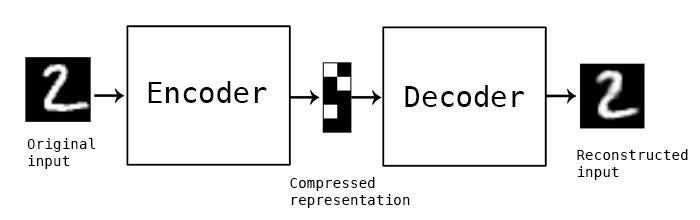

(figure from this great tutorial on auto-encoders: https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726/)

This lets us explore the structure of the latent space in a more meaningful way. For MNIST, for example, the model can learn what "a typical 2" looks like and also how variations of the digit 2 appear in this space. This is very useful in neuroscience, where we want to understand what parts of the signal contain useful structure or variation.

When using images, the encoder is a neural network that compresses the image into latent variables. The decoder is a mirrors this process: it starts from the latent variables and uses transposed convolutions to rebuild the original image.



In [ ]:
'''
We will first build the encoder-decoder architecture for the VAE. Both of these are neural networks. 
They consist of a few layers that transform the data into different representations, connected to previous layers through weights and biases. 
Learning these weights and biases helps the model learn a mapping from the original high-dimensional input to a compressed latent space and back to the original data.
'''
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 400) # input layer to hidden layer - the input is a flattened 28x28 image (784 pixels), the output is a hidden layer with a lower dimentionality, e.g. 400 neurons
        # the encoder will output two vectors: mu and logvar, which are used to sample from a normal distribution
        self.mean_layer = nn.Linear(400, 2) # mean vector
        self.variance_layer = nn.Linear(400, 2) # log variance vector
        # the decoder will take a sample from the normal distribution and output a reconstructed image
        self.fc3 = nn.Linear(2,...) # TODO complete this code - HINT: the architecture of the decoder is similar to the encoder, but in reverse. This layer goes from the latent space back to the hidden layer
        self.fc4 = nn.Linear(..., 784) # TODO complete this code - HINT: this layer goes from the hidden layer back to the output layer, which is a flattened 28x28 image (784 pixels)
        # activation function that tranform the output of the layers to a non-linear space, which we need to learn complex mappings! Compare this to thresholds in biological neurons.
        self.relu = nn.ReLU() # ReLU activation function is commonly used in hidden layers to introduce non-linearity
        self.sigmoid = nn.Sigmoid()# we use sigmoid activation function for the output layer to ensure the output is in the range [0, 1], suitable for pixel values

    # encode function takes an input x and returns the mean and log variance vectors
    def encode(self, x):
        h1 = ...  # TODO - apply the first layer and activation function to the input x
        return self.mean_layer(h1), self.variance_layer(h1) # apply the mean and variance layers to the hidden layer output h1 to get the mean and log variance vectors

    # reparameterize function samples from the normal distribution using the mean and log variance vectors
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar) # compute the standard deviation from the log variance
        eps = torch.randn_like(std) # sample from a standard normal distribution with the same shape as std
        # reparameterization trick: sample from the normal distribution using the mean and standard deviation. this allows us to backpropagate through the sampling process
        return mu + eps*std # TODO - explain how this corresponds to representing your latent space as a normal distribution. This is the reparameterization trick that allows us to backpropagate through the sampling process.

    # decode function takes a sample z from the latent space and reconstructs the input image
    def decode(self, z): # z is the sampled latent vector
        h3 = ... # TODO - apply the first layer and activation function to the input x
        return ... # TODO - apply the output layer to the hidden layer output h3 to get the reconstructed image. HINT - think about which activation function to use here!

    # forward function combines the encoding, reparameterization, and decoding steps
    def forward(self, x):
        mu, logvar = self....# TODO - call the encode function to get the mean and log variance vectors
        z = ... # TODO - call the reparameterize function to sample from the normal distribution using the mean and log variance vectors
        return self.decode(z), mu, logvar # we return the reconstructed image, mean, and log variance vectors

### Loss function for our VAE

Next, we will define our loss function for the VAE.  The VAE loss guides the model to both reconstruct the input and learn a useful latent space. 

It has two parts:
    Reconstruction loss: compares the input and output, which tells us how well the model rebuilds the image.
    KL divergence: makes sure the latent space follows a standard normal distribution. This helps structure the space so we can sample and explore it meaningfully.

Together, these two losses balance accurate reconstruction with a well-behaved latent space.

In [ ]:
# for a VAE, there are two parts of the loss function. 
def loss_function(recon_x, x, mu, logvar):
    reconstruction_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum') # reconstruction loss - binary cross-entropy between the reconstructed image and the original image
    similarity_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) # similarity loss - KL divergence between the learned latent distribution and a standard normal distribution
    return reconstruction_loss + similarity_loss

_Exercise:_

Explain what objectives the loss function guides, for our example of the MNIST dataset. What are the two parts trying to achieve?

### Training of our VAE

The final step is to train the VAE model we defined on our data. Go through the code below and try to understand what each part does.

What parts of your network architecture are being updated, and how is learning happening?

Think back to what the loss function is guiding — how does the model know what to change in order to improve both reconstruction and the structure of the latent space?

In [ ]:
### Training the VAE on the MNIST dataset
# load and preprocess the MNIST dataset. 
transform = transforms.ToTensor() #  we represent our data as tensors, as PyTorch uses tensors as the basic data structure for computations
dataset = datasets.MNIST('.', train=True, download=True, transform=transform) # this torch function downloads the MNIST dataset and applies the transformation to each image
dataloader = DataLoader(dataset, batch_size=128, shuffle=True) # # create a DataLoader to iterate over the dataset in batches, which makes training more efficient and allows us to use GPUs.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # check if a GPU is available, if not, use the CPU
model = VAE().to(device) # instantiate the VAE model and move it to the device (GPU or CPU)
optimizer = optim.Adam(model.parameters(), lr=1e-3) # the adam optimizer is a popular choice for training neural networks. the optimiser is used to update the model parameters during training based on the computed gradients.

# training loop
model.train()
for epoch in range(10): # epochs define how many times we will iterate over the entire dataset
    for data, _ in dataloader: # we iterate over the DataLoader to get batches of data
        data = data.view(-1, 784).to(device) # flatten the images to a 1D vector of size 784 (28x28) and move the data to the device (GPU or CPU)
        optimizer.zero_grad() # reset the gradients to zero before computing the gradients for the current batch
        ... # TODO - forward pass through the model to get the reconstructed image, mean, and log variance vectors
        loss = loss_function(...) # TODO - compute the loss using the loss function defined above
        print('loss:', loss.item())
        loss.backward()
        optimizer.step()

# after training, we can visualize the latent space of the trained VAE by encoding the MNIST images and plotting the mean vectors in a 2D space.
model.eval()
data, labels = next(iter(DataLoader(dataset, batch_size=1000)))
data = data.view(-1, 784).to(device)
with torch.no_grad():
    mu, _ = model.encode(data)
mu = mu.cpu().numpy()
labels = labels.numpy()

plt.figure(figsize=(8,6))
plt.scatter(mu[:,0], mu[:,1], c=labels, cmap='tab10', s=5, alpha=0.7)
plt.colorbar(label='Digit Label')
plt.xlabel('Latent dimension 1')
plt.ylabel('Latent dimension 2')
plt.title('VAE Latent Space Visualization')
plt.show()

### Extension: generate samples from latent space

To inspect what type of information our model learned to preserve, we can inspect the latent space. Due to the probabilistic nature of the encoded space, we can sample from our distributions to generate new samples under the learned information.

First, we will sample from the whole latent space to get a few random samples, and next we can try to cluster the space more meaningfully so that we get specific digits under more controlled conditions - for example, sampling from clusters in the latent space that correspond to a particular digit.

This gives us insight into what kind of structure our model has learned - are digits separated clearly, and does interpolation between them lead to realistic variations?

In [ ]:
## TODO add your code for sampling here!